# ANALYSIS OF SPAIN DEMOGRAPHIC DATA - PART II

## Introduction

This work aims to continue analyzing, via python and libraries, the demographic data of __INE - Instituto Nacional de Estadística de España__.

Thus, to achieve the objective, we will define the INE files to be downloaded to verify the demographic evolution related to the Autonomous Communities, Provinces and Municipalities. We will also, if there is this information, make an approach on population density among other factors.

After defining these files, we will define the methodology for extracting/debugging the data, and then preparing the analytical graphs.

Let's **'import'** all usable libraries and activate the proper locale:

In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
import locale
from locale import atof
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import datetime as dt
locale.setlocale(locale.LC_TIME, 'es_ES')

'es_ES'

## Task 1:
Let's make some graphs already worked and using local files of type **csv** to recall a TopDown view of the territorial division structure of Spain:

As a first activity, we are going to import the data prepared and stored locally and generate the graph of the provinces by autonomous communities:

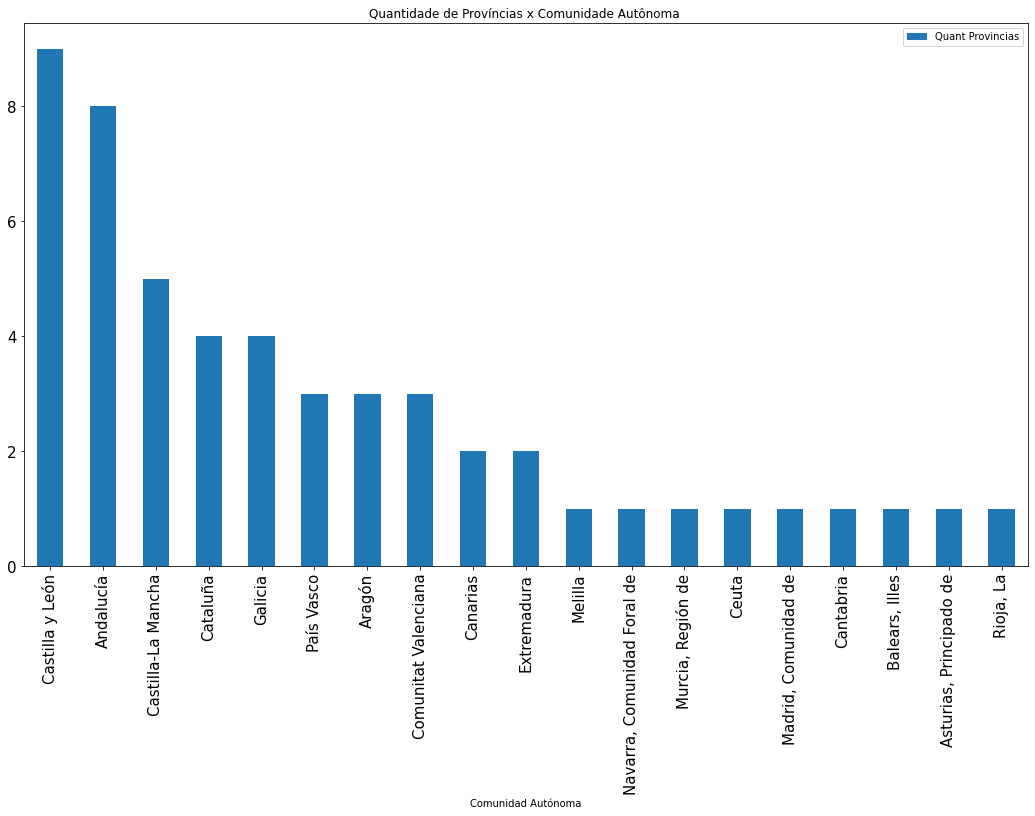

In [2]:
dfs111a = pd.read_csv('dfs111.csv')
ax1 = dfs111a.plot.bar(x='Comunidad Autónoma',rot=90, figsize= (18,10),fontsize=15,title=
                     "Quantidade de Províncias x Comunidade Autônoma ")

Let's now generate the "Number of Municipalities X Autonomous Community" graph based on locally imported data.

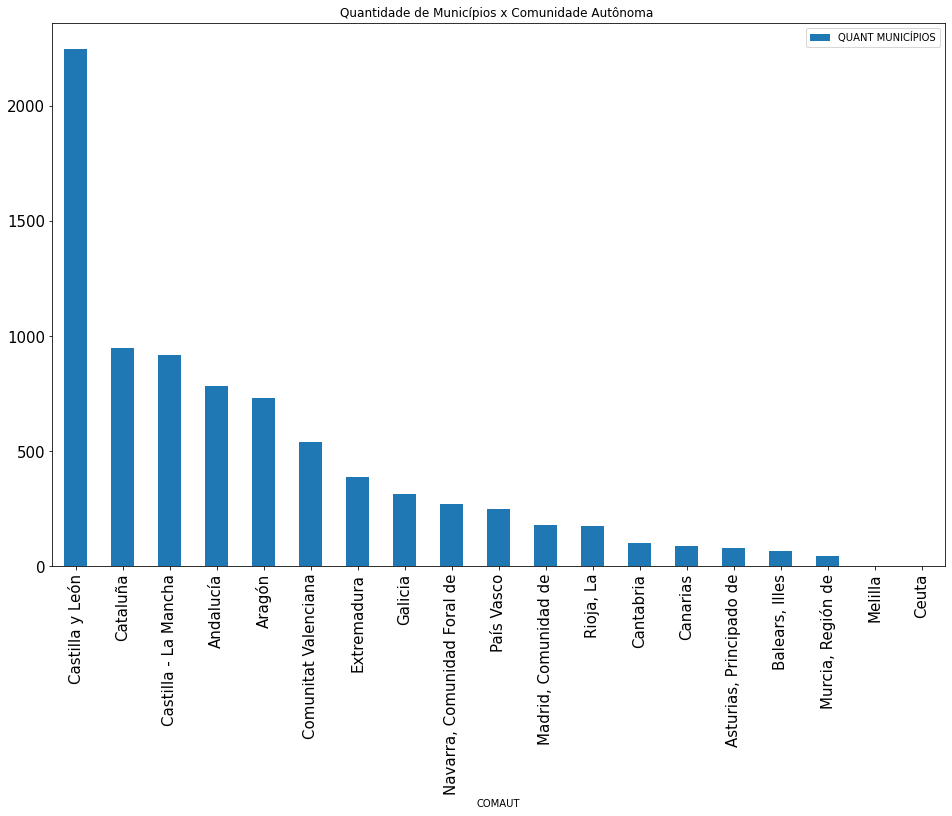

In [3]:
dfs122b = pd.read_csv('dfs122a.csv')
ax2 = dfs122b.plot.bar(x='COMAUT',rot=90, figsize= (16,10),fontsize=15,title=
                     "Quantidade de Municípios x Comunidade Autônoma ")

Let's now generate the "Number of Municipalities X Province" graph, based on locally imported data.

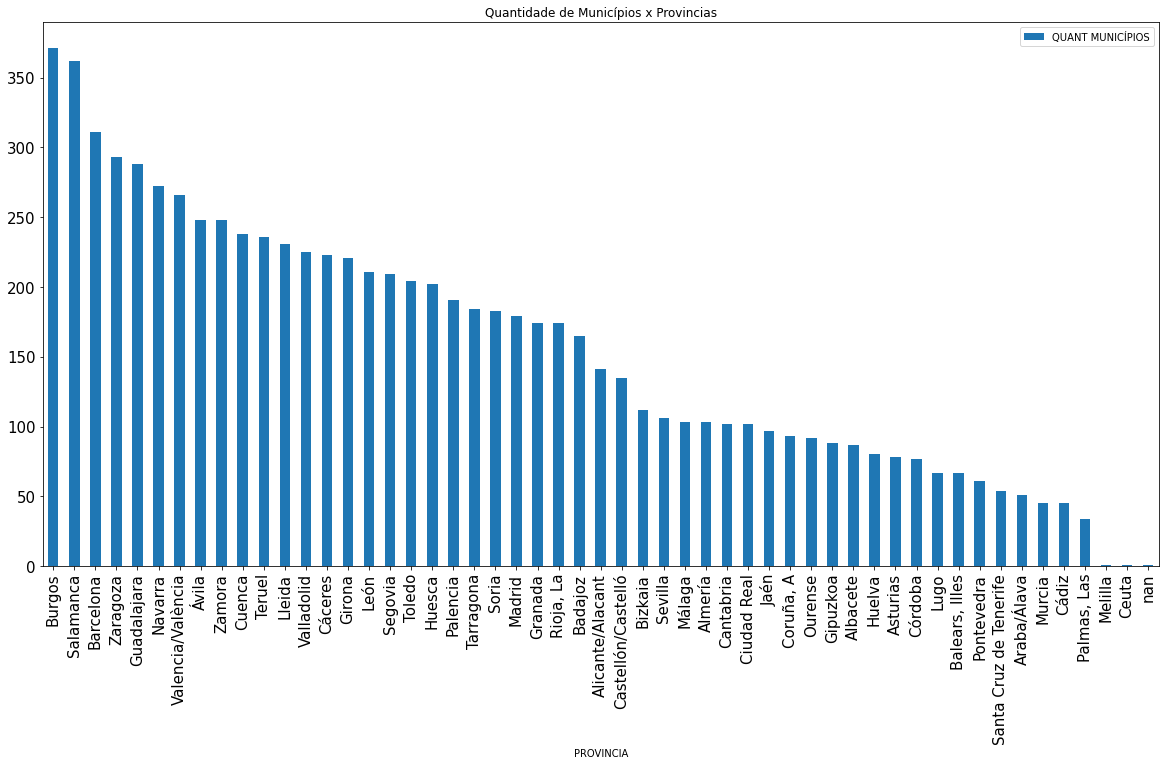

In [4]:
dfs122c = pd.read_csv('dfs122b.csv')
ax3 = dfs122c.plot.bar(x='PROVINCIA',rot=90, figsize= (20,10),fontsize=15,title=
                     "Quantidade de Municípios x Provincias")

In [5]:
dfs122c.head()

,PROVINCIA,QUANT MUNICÍPIOS
0,Burgos,371
1,Salamanca,362
2,Barcelona,311
3,Zaragoza,293
4,Guadalajara,288


## Task 2:

Let's do some analysis on the Autonomous Communities, using INE tables. Let's import data related to all Communities, and separate some for more details. It is worth remembering that the table contains total data by province, total data by gender by province, and total data by province, taking into account genders, and ages ranging from 0 years to 100+ years.

We are going to make two graphs: one to present the demographic evolution of two autonomous communities similar in number of people, which are Madrid and Cataluña and the other to present two other similar autonomous communities that are Castilla y León and Galicia, which have a similar number of people.

In [6]:
url50_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/9681.xlsx?nocab=1"
dfs1240=pd.read_excel(url50_estatica, header=None,skiprows=[0,1,2,3,4,5,7])
# como vem espaços nos campos tipo string usa-se o strip() para remover esses espaços, principalmente na esquerda
dfs1240[0]=dfs1240[0].str.strip()
for i in dfs1240.columns:
    if i > 0:
        dd10 = dfs1240.loc[0,i]
        datetime_object10 = dt.strptime(dd10,'%d de %B de %Y')
        gg10 = datetime_object10.strftime("%m/%Y")
        dfs1240.loc[0,i]=gg10
        
dfs1240.columns = dfs1240.iloc[0]
dfs1240.drop([0], axis=0, inplace = True)
dfs1240a = dfs1240.iloc[:, ::-1]
dfs1240a.reset_index(inplace = True)
listq1241=[]
listq1242=[]
listq1243=[]
listq1244=[]

dfs1241 = dfs1240a[dfs1240a[''] == '07 Castilla y León']
dfs1242 = dfs1240a[dfs1240a[''] == '13 Madrid, Comunidad de']
dfs1243 = dfs1240a[dfs1240a[''] == '09 Cataluña']
dfs1244 = dfs1240a[dfs1240a[''] == '12 Galicia']
diction41 = dfs1241.iloc[:,0].to_dict()
diction42 = dfs1242.iloc[:,0].to_dict()
diction43 = dfs1243.iloc[:,0].to_dict()
diction44 = dfs1244.iloc[:,0].to_dict()

listq1241 = list(diction41.keys())
listq1242 = list(diction42.keys())
listq1243 = list(diction43.keys())
listq1244 = list(diction44.keys())


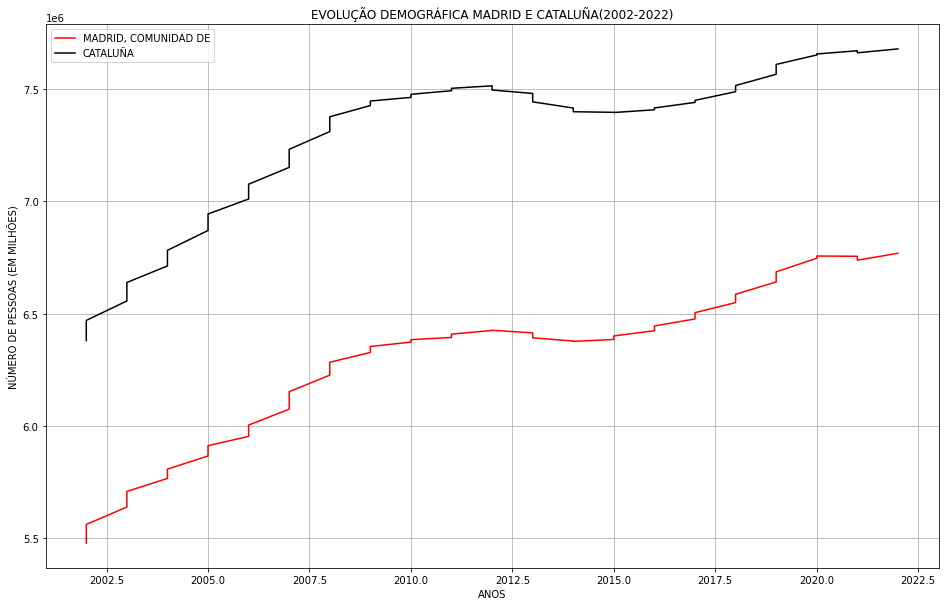

In [53]:
import numpy as np
import matplotlib.pyplot as plt

listq1241a = dfs1240a.iloc[29,1:42].tolist()
listq1242a = dfs1240a.iloc[53,1:42].tolist()
listq1243a = dfs1240a.iloc[37,1:42].tolist()
listq1244a = dfs1240a.iloc[49,1:42].tolist()

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
plt.title("EVOLUÇÃO DEMOGRÁFICA MADRID E CATALUÑA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Definir valores dos dados
x = [2002,2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

#y = listq1241a
z = listq1242a
w = listq1243a
#k = listq1244a
# Plotar os gráficos
#plt.plot(x, y,label = 'CASTILLA Y LEÓN', color = "blue")
plt.plot(x,z,label = 'MADRID, COMUNIDAD DE', color = "red")
plt.plot(x,w,label = 'CATALUÑA', color = "black")
#plt.plot(x,k,label = 'GALICIA', color = "gray")



plt.legend()
plt.grid()

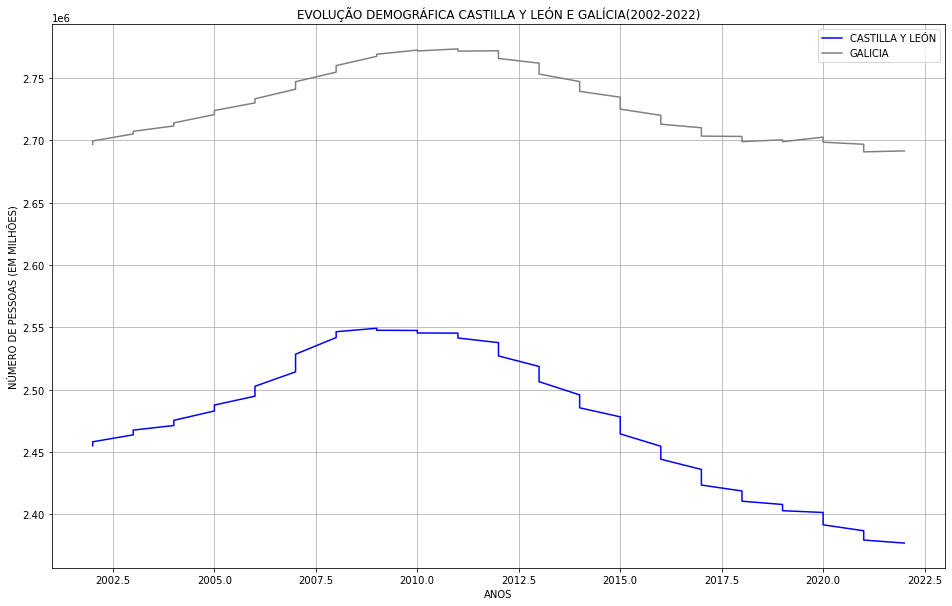

In [54]:
import numpy as np
import matplotlib.pyplot as plt

listq1241a = dfs1240a.iloc[29,1:42].tolist()
listq1242a = dfs1240a.iloc[53,1:42].tolist()
listq1243a = dfs1240a.iloc[37,1:42].tolist()
listq1244a = dfs1240a.iloc[49,1:42].tolist()

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
plt.title("EVOLUÇÃO DEMOGRÁFICA CASTILLA Y LEÓN E GALÍCIA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Definir valores dos dados
x = [2002,2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

y = listq1241a
#z = listq1242a
#w = listq1243a
k = listq1244a
# Plotar os gráficos
plt.plot(x, y,label = 'CASTILLA Y LEÓN', color = "blue")
#plt.plot(x,z,label = 'MADRID, COMUNIDAD DE', color = "red")
#plt.plot(x,w,label = 'CATALUÑA', color = "black")
plt.plot(x,k,label = 'GALICIA', color = "gray")



plt.legend()
plt.grid()

In a first analysis, it is observed that Catalonia and Madrid present a **positive evolution** in their population. Around **2011** they showed a positive evolution, switching to a **negative evolution** until **2015**, from where they started to evolve positively.

Castilla y León and Galicia showed a **positive evolution** until **2010** and from then on, they **evolved negatively** until the present day.

We will verify all population growth rates of all autonomous communities, considering the period from 2015 to 2022. For this, we will work with **dfs1240a**, calculating the rate for each community and for Spain as a whole, given that we have already calculated that of Spain which was **0.3%**. At the end we generate the **dfs1240aa**, as a result:

In [56]:
import math

lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
result = ((math.pow(dfs1240a.iloc[1,41]/dfs1240a.iloc[1,27],1/7) - 1)*100)
result1=round(result,3)

lista1.append(dfs1240a.iloc[0,42])
lista2.append(result1)
lista3.append(dfs1240a.iloc[1,27])
lista4.append(dfs1240a.iloc[1,41])
lista5.append(dfs1240a.iloc[1,41]-dfs1240a.iloc[1,27])
f=5
for j in range(len(dfs1240a)):
    if f<= 77:
        result = ((math.pow(dfs1240a.iloc[f,41]/dfs1240a.iloc[f,27],1/7) - 1)*100)
        result1=round(result,3)

        lista1.append(dfs1240a.iloc[f-1,42])
        lista2.append(result1)
        lista3.append(dfs1240a.iloc[f,27])
        lista4.append(dfs1240a.iloc[f,41])
        lista5.append(dfs1240a.iloc[f,41]-dfs1240a.iloc[f,27])   
        f=f+4
dict1={"COM. AUT":lista1,"POP.(2015)":lista3,"POP.(2022)":lista4,"DIF:":lista5,"TAXA(%)":lista2}        
dfs1240aa=pd.DataFrame(dict1)
dfs1240aa
dfs1240aa.sort_values(by=['TAXA(%)'],inplace=True)
dfs1240aa.reset_index(inplace=True)
dfs1240aa.head()

,index,COM. AUT,POP.(2015),POP.(2022),DIF:,TAXA(%)
0,3,"03 Asturias, Principado de",1049875,1006193,-43682,-0.605
1,7,07 Castilla y León,2478079,2376739,-101340,-0.595
2,11,11 Extremadura,1091623,1053302,-38321,-0.509
3,18,18 Ceuta,84692,82533,-2159,-0.368
4,19,19 Melilla,84570,83196,-1374,-0.234


Observing the data from **dfs1240aa** with increasing ordering in the rates (from the lowest rate to the highest growth rate), it can be seen that **Asturias** leads with a negative rate, followed by Castilla y León. Negative rate means **reduction in population**.

It appears that the Balearic Islands, followed by Madrid and the Canary Islands, lead with a positive rate, which means an **increase in population**.

However, these rates must be relativized by the amount of population in each Community. Next, we will verify the amount of population in each community, taking 01/2022 as a reference, in order to treat this relativization by showing the ** INHABITANTS RATE **, within the context of the nation, which expresses the weighted degree of the populations of each community .

In [57]:
lista10=[]
lista20=[]
lista30=[]
lista10.append(dfs1240a.iloc[0,42])
lista20.append(dfs1240a.iloc[1,41])
result20=((dfs1240a.iloc[1,41]/dfs1240a.iloc[1,41])*100)
result21=round(result20,2)
lista30.append(result21)
f=5
for j in range(len(dfs1240a)):
    if f<= 77:
        lista10.append(dfs1240a.iloc[f-1,42])
        lista20.append(dfs1240a.iloc[f,41])
        result20=((dfs1240a.iloc[f,41]/dfs1240a.iloc[1,41])*100)
        result21=round(result20,2)
        lista30.append(result21)
        f=f+4
dict100={"REGIÃO":lista10,"POPULAÇÃO":lista20,"TAXA HABIT(%).":lista30}        
dfs1240bb=pd.DataFrame(dict100)
dfs1240bb.sort_values(by=['POPULAÇÃO'],ascending=False,inplace=True)
dfs1240bb.reset_index(inplace=True)
dfs1240bb.to_csv('dfs1240bb.csv',index=False)
dfs1240bb.head(5)

,index,REGIÃO,POPULAÇÃO,TAXA HABIT(%).
0,0,Total Nacional,47432805,100.00
1,1,01 Andalucía,8518053,17.96
2,9,09 Cataluña,7679410,16.19
3,13,"13 Madrid, Comunidad de",6769113,14.27
4,10,10 Comunitat Valenciana,5072176,10.69


Thus, although **Islas Baleares** appear as the one with the highest population growth rate (**1.61%**), they are in the **12** position in housing rate. In other words, a population growth of 1.61% for the Balearic Islands corresponds to around **99,000 people**.

In Catalunha, which ranks **16**, there was a growth rate of **0.54%**, which corresponds to around **282,419 people**, representing approximately **3 times more** than the Balearic Islands.

Thus, in order to make a more accurate analysis, more absolute factors must be taken into account, such as the total number of inhabitants and the percentage of increase or decrease in population, still in absolute numbers.

Let's draw up a graph depicting the Population Growth Rate X Autonomous Communities, along with the national level, to see where there was an increase and decrease in population:

In [58]:
dfs1240aa.head()

,index,COM. AUT,POP.(2015),POP.(2022),DIF:,TAXA(%)
0,3,"03 Asturias, Principado de",1049875,1006193,-43682,-0.605
1,7,07 Castilla y León,2478079,2376739,-101340,-0.595
2,11,11 Extremadura,1091623,1053302,-38321,-0.509
3,18,18 Ceuta,84692,82533,-2159,-0.368
4,19,19 Melilla,84570,83196,-1374,-0.234


Text(0, 0.5, 'Taxa(%) Anual Demográfica (2015-2022)')

<Figure size 1800x1152 with 0 Axes>

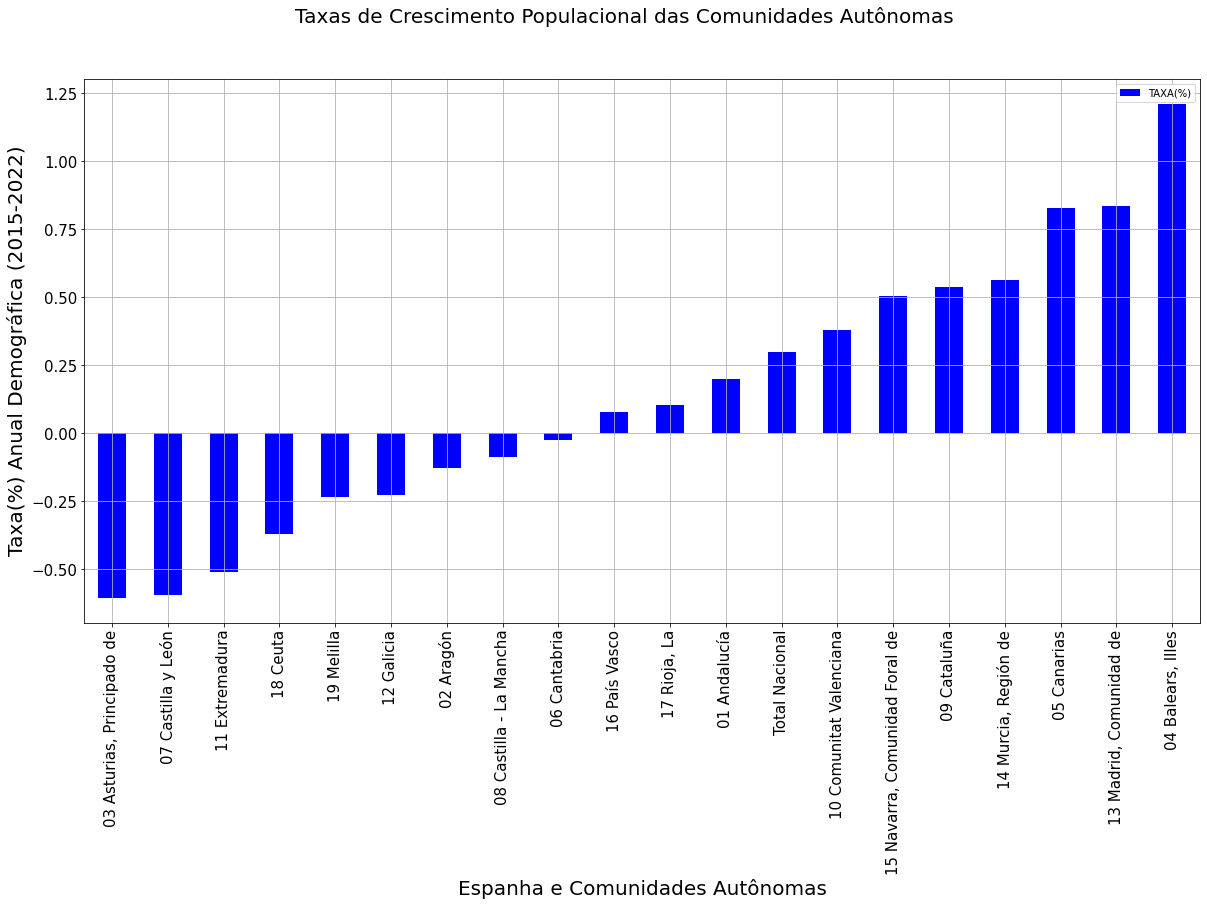

In [59]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(16)

ax3a = dfs1240aa.plot.bar(x='COM. AUT',y='TAXA(%)',rot=90, figsize= (20,10),fontsize=15,color = 'blue')
plt.suptitle("Taxas de Crescimento Populacional das Comunidades Autônomas", fontsize= 20)
plt.grid()
# ax3a.legend(loc='best', fontsize=20)
plt.xlabel("Espanha e Comunidades Autônomas",fontsize=20)
plt.ylabel("Taxa(%) Anual Demográfica (2015-2022)",fontsize=20)

Finally, we will import a csv file, **df111.csv** to list the number of provinces by communities.

In [61]:
dfs111x = pd.read_csv('dfs111.csv')
dfs111x.head()

,Comunidad Autónoma,Quant Provincias
0,Castilla y León,9
1,Andalucía,8
2,Castilla-La Mancha,5
3,Cataluña,4
4,Galicia,4


## Task 3:

We will elect two Autonomous Communities and then one province, per community, to elaborate further details on demography. This Community will be **Castilla Y León**, which has 9 provinces and we are going to elect the province of **León**.

We are still going to elect the Community of **Madrid**, which has a province that is **Madrid**.


Using the SQL command made in **dfs122b**, it is verified that the number of municipalities in Castilla y León is **2248**.
The province to be elected is Leon. By the sql made in **dfs211c** the number of municipalities in León is **211**

Using the SQL command made in **dfs122b**, it appears that the number of municipalities in Madrid is **179**.
The province to be elected is Madrid. By the sql made in **dfs211c** the number of municipalities in Madrid is **179**.



In [62]:
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
pysqldf = lambda q: sqldf(q, globals())
query = "SELECT * FROM dfs122b WHERE COMAUT = 'Castilla y León';"

pysqldf(query)

,COMAUT,QUANT MUNICÍPIOS
0,Castilla y León,2248


In [63]:
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
pysqldf = lambda q: sqldf(q, globals())
query = "SELECT * FROM dfs122c WHERE PROVINCIA = 'León';"

pysqldf(query)

,PROVINCIA,QUANT MUNICÍPIOS
0,León,211


In [64]:
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
pysqldf = lambda q: sqldf(q, globals())
query = "SELECT * FROM dfs122b WHERE COMAUT = 'Madrid, Comunidad de';"

pysqldf(query)

,COMAUT,QUANT MUNICÍPIOS
0,"Madrid, Comunidad de",179


In [65]:
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
pysqldf = lambda q: sqldf(q, globals())
query = "SELECT * FROM dfs122c WHERE PROVINCIA = 'Madrid';"

pysqldf(query)

,PROVINCIA,QUANT MUNICÍPIOS
0,Madrid,179


Let's check the list of **211** municipalities in **León**. For this, we are going to import the **dfs122.csv** creating a dataframe **dfs1222**. Next, we will create a **dfs1222a**, making a select sql in **dfs1222**, in the province of León, trying to highlight the municipality of **León**.


In [18]:
dfs1222 = pd.read_csv('dfs122.csv')
query = "SELECT PROVINCIA,MUNICIPIO FROM dfs1222 WHERE PROVINCIA = 'León';"

dfs1222a = pysqldf(query)
dfs1222a.sort_values(by=['MUNICIPIO'],inplace=True)
dfs1222a.iloc[80:85,:]

,PROVINCIA,MUNICIPIO
81,León,Laguna de Negrillos
82,León,León
83,León,Llamas de la Ribera
84,León,Lucillo
85,León,Luyego


Let's check the list of **179** municipalities in Madrid. For this, we are going to create the **dfs1222b** dataframe by doing a select sql in **dfs1222** in the province of Madrid, trying to highlight the municipality of **Madrid**.

In [19]:

query = "SELECT PROVINCIA,MUNICIPIO FROM dfs1222 WHERE PROVINCIA = 'Madrid';"

dfs1222b = pysqldf(query)
dfs1222b.sort_values(by=['MUNICIPIO'],inplace=True)
dfs1222b.iloc[75:80,:]

,PROVINCIA,MUNICIPIO
77,Madrid,Lozoyuela-Navas-Sieteiglesias
78,Madrid,Madarcos
79,Madrid,Madrid
80,Madrid,Majadahonda
81,Madrid,Manzanares el Real


We are going to import data for all 50 provinces in Spain, and separate the province of León. It is worth remembering that the table contains total data by province, total data by gender by province, and total data by province, taking into account genders, and ages ranging from 0 years to 100+ years.

For now, we are going to act on the total data of León and that are found in the row indexes **108(title=24 León), 109(both sexes), 110(men) and 111(women)** and which are for all ages and considering the dataframe **dfs1230a**. Also, let's reverse the order of the years from **2022-2002** to **01/2002-01/2022**:

In [71]:
url100_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/9688.xlsx?nocab=1"
dfs1230=pd.read_excel(url100_estatica, header=None,skiprows=[0,1,2,3,4,5,7,21733,21734,21735,21736,21737,
                                                             21738,21739,21740,21741,21742,21743])
# como vem espaços nos campos tipo string usa-se o strip() para remover esses espaços, principalmente na esquerda
dfs1230[0]=dfs1230[0].str.strip()

for i in dfs1230.columns:
    if i > 0:
        dd1 = dfs1230.loc[0,i]
        datetime_object1 = dt.strptime(dd1,'%d de %B de %Y')
        gg1 = datetime_object1.strftime("%m/%Y")
        dfs1230.loc[0,i]=gg1
dfs1230.columns = dfs1230.iloc[0]
dfs1230.drop([0], axis=0, inplace = True)
dfs1230a = dfs1230.iloc[:, ::-1]
dfs1230a.reset_index(inplace = True)
listq=[]
dfs1231 = dfs1230a[dfs1230a[''] == '24 León']
diction = dfs1231.iloc[:,0].to_dict()
listq = list(diction.keys())


In [72]:
dfs1230a.iloc[108:112,:]

,index,01/2002,07/2002,01/2003,07/2003,01/2004,07/2004,01/2005,07/2005,01/2006,...,01/2018,07/2018,01/2019,07/2019,01/2020,07/2020,01/2021,07/2021,01/2022,
108,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24 León
109,110,487511,487048,487393,487341,487073,487110,487440,487687,488534,...,466108,463724,462496,460484,459236,456728,455098,453309,452219,Ambos sexos
110,111,237543,237218,237398,237273,237154,237130,237318,237482,238043,...,227182,225965,225326,224310,223608,222428,221506,220600,219999,Hombres
111,112,249968,249829,249995,250068,249919,249981,250121,250205,250491,...,238926,237759,237169,236174,235628,234300,233592,232708,232219,Mujeres


Let's create a **dfs1232** dataframe based on **dfs1231a** with data for both genders, male and female:


In [21]:
dfs1232=dfs1230a.iloc[109:112,2:]
dfs1232

,07/2002,01/2003,07/2003,01/2004,07/2004,01/2005,07/2005,01/2006,07/2006,01/2007,...,01/2018,07/2018,01/2019,07/2019,01/2020,07/2020,01/2021,07/2021,01/2022,
109,487048,487393,487341,487073,487110,487440,487687,488534,489753,491130,...,466108,463724,462496,460484,459236,456728,455098,453309,452219,Ambos sexos
110,237218,237398,237273,237154,237130,237318,237482,238043,238803,239637,...,227182,225965,225326,224310,223608,222428,221506,220600,219999,Hombres
111,249829,249995,250068,249919,249981,250121,250205,250491,250950,251493,...,238926,237759,237169,236174,235628,234300,233592,232708,232219,Mujeres


Let's make two graphs of the **province of León**, showing the **total demographic evolution** and **by sexes**, between 2002 and 2022.

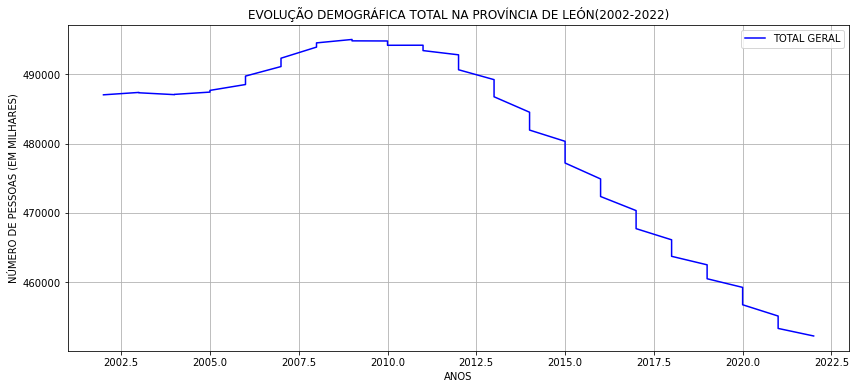

In [78]:
import matplotlib.pyplot as plt

l1232a = dfs1232.iloc[0,0:40].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NA PROVÍNCIA DE LEÓN(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHARES)")

# Define valores de dados
x = [2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

y = l1232a



plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")

plt.legend()
plt.grid()


plt.show()

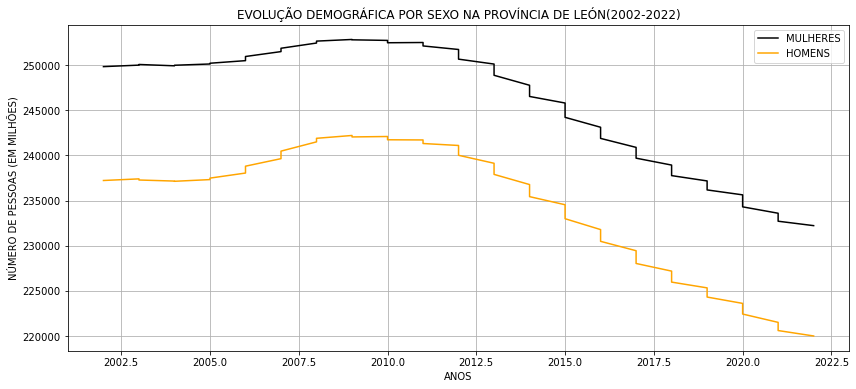

In [79]:
import matplotlib.pyplot as plt
l1232b = dfs1232.iloc[1,0:40].tolist()
l1232c = dfs1232.iloc[2,0:40].tolist()

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA POR SEXO NA PROVÍNCIA DE LEÓN(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

z = l1232b
w = l1232c


plt.plot(x,w,label = 'MULHERES', color = "black")
plt.plot(x,z,label = 'HOMENS', color = "orange")

plt.legend()
plt.grid()


plt.show()

Let's make two graphs of the province of Madrid, showing the **total demographic evolution** and **by sexes**, between 2002 and 2022.2.

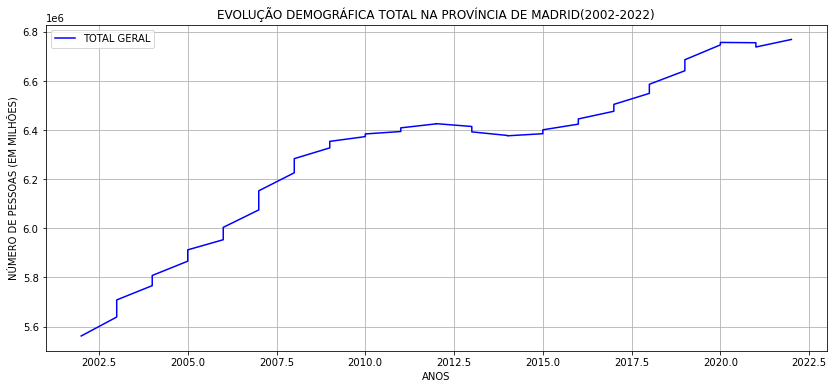

In [80]:
dfs1235=dfs1230a.iloc[121:124,2:]
dfs1235
l1235a = dfs1235.iloc[0,0:40].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NA PROVÍNCIA DE MADRID(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

y = l1235a


# Plot another line on the same chart/graph
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")

plt.legend()
plt.grid()


plt.show()


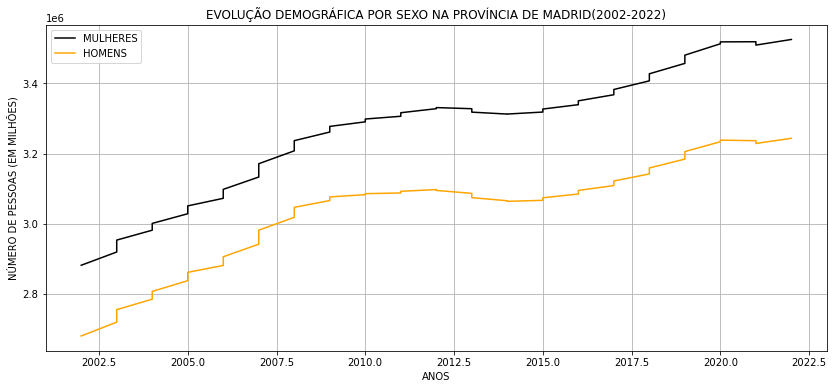

In [81]:
import matplotlib.pyplot as plt
l1236a = dfs1235.iloc[1,0:40].tolist()
l1237a = dfs1235.iloc[2,0:40].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA POR SEXO NA PROVÍNCIA DE MADRID(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,
     2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021,2022]

z = l1236a
w = l1237a

# Plot another line on the same chart/graph
plt.plot(x,w,label = 'MULHERES', color = "black")
plt.plot(x,z,label = 'HOMENS', color = "orange")

plt.legend()
plt.grid()


plt.show()

## Task 3:

Let's analyze municipality data from the provinces of León and Madrid. We will elect the most important municipalities in the two provinces that are León and Madrid. We are going to import data from all the municipalities in these two provinces in order to proceed with the analysis.

Let's import data from the following sites:

                - Para León:  "https://www.ine.es/jaxiT3/files/t/es/xlsx/2877.xlsx?nocab=1"

                - Para Madrid:"https://www.ine.es/jaxiT3/files/t/es/xlsx/2881.xlsx?nocab=1"

We will debug the data and create two basic dataframes for analysis: a **dfs80a3** dataframe for the **municipalities of León** and another **dfs90a3** dataframe for the **municipalities of Madrid**.


In [82]:
url80_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/2877.xlsx?nocab=1"
dfs80=pd.read_excel(url80_estatica, header=None,skiprows=[0,1,2,3,4,5,6])
# como vem espaços nos campos tipo string usa-se o strip() para remover esses espaços, principalmente na esquerda
dfs80[0]=dfs80[0].str.strip()
dfs80a=dfs80.iloc[0:212,:]
dfs80a.columns = dfs80a.iloc[0]
dfs80a = dfs80a.iloc[:, ::-1]
dfs80a.drop([0], axis=0, inplace = True)
dfs80a.reset_index(inplace = True)
del dfs80a['1997']
# o dfs80 possui 77 colunas x 211 linhas. Ele possui dados totais , por homens e por mulheres
# Vamos usar somente dados totais, de ambos os sexos.
# essa instrução separa a coluna com os nomes dos municipios
dfs80a1=dfs80a[['']]
#Essa instrução separa o leque de anos de 1996 (pula 1997) e vai até 2021
dfs80a2=dfs80a.iloc[:,51:76]
#Essa instrução junta os dois dataframes na ordem esperada e na quantidade de ambos os sexos somente
dfs80a3=dfs80a1.join(dfs80a2)
dfs80a3.head(4)

,,1996.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,24 León,517191.0,506365.0,506511.0,502155.0,499517.0,496655.0,495998.0,492720.0,495902.0,...,494451.0,489752.0,484694.0,479395.0,473604.0,468316.0,463746.0,460001.0,456439.0,451706.0
1,24001 Acebedo,305.0,291.0,287.0,284.0,290.0,282.0,280.0,277.0,273.0,...,256.0,230.0,222.0,225.0,215.0,205.0,202.0,187.0,184.0,185.0
2,24002 Algadefe,388.0,382.0,382.0,371.0,362.0,344.0,335.0,337.0,323.0,...,303.0,307.0,300.0,284.0,279.0,284.0,286.0,289.0,278.0,283.0
3,24003 Alija del Infantado,1051.0,1006.0,1006.0,962.0,941.0,949.0,935.0,905.0,883.0,...,798.0,760.0,758.0,715.0,696.0,687.0,671.0,647.0,629.0,594.0


Vamos elaborar agora dois gráficos retratando o desenvolvimento populacional das **Províncias de León e de Madrid**

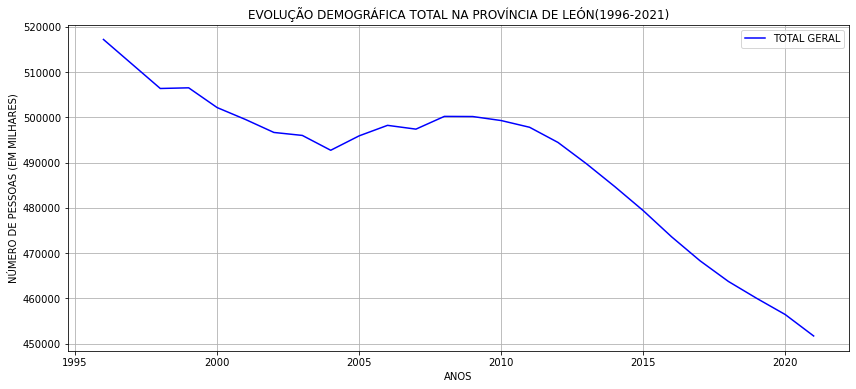

In [83]:

l180a3a = dfs80a3.iloc[0,1:26].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NA PROVÍNCIA DE LEÓN(1996-2021)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHARES)")

# Define data values
x = [1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
    2019,2020,2021]

y = l180a3a


# Plot another line on the same chart/graph
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")

plt.legend()
plt.grid()


plt.show()

In [84]:
url90_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/2881.xlsx?nocab=1"
dfs90=pd.read_excel(url90_estatica, header=None,skiprows=[0,1,2,3,4,5,6])
# como vem espaços nos campos tipo string usa-se o strip() para remover esses espaços, principalmente na esquerda
dfs90[0]=dfs90[0].str.strip()
dfs90a=dfs90.iloc[0:180,:]
dfs90a.columns = dfs90a.iloc[0]
dfs90a = dfs90a.iloc[:, ::-1]
dfs90a.drop([0], axis=0, inplace = True)
dfs90a.reset_index(inplace = True)
del dfs90a['1997']
# essa instrução separa a coluna com os nomes dos municipios
dfs90a1=dfs90a[['']]
#Essa instrução separa o leque de anos de 1996 (pula 1997) e vai até 2021
dfs90a2=dfs90a.iloc[:,51:76]
#Essa instrução junta os dois dataframes na ordem esperada e na quantidade de ambos os sexos somente
dfs90a3=dfs90a1.join(dfs90a2)
dfs90a3.head(4)



,,1996.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,28 Madrid,5022289.0,5091336.0,5145325.0,5205408.0,5372433.0,5527152.0,5718942.0,5804829.0,5964143.0,...,6498560.0,6495551.0,6454440.0,6436996.0,6466996.0,6507184.0,6578079.0,6663394.0,6779888.0,6751251.0
1,"28001 Acebeda, La",53.0,47.0,47.0,57.0,56.0,53.0,55.0,55.0,60.0,...,65.0,67.0,67.0,65.0,66.0,66.0,65.0,84.0,68.0,55.0
2,28002 Ajalvir,1622.0,1817.0,1936.0,2205.0,2386.0,2526.0,2755.0,2925.0,3062.0,...,4203.0,4261.0,4339.0,4343.0,4440.0,4455.0,4559.0,4712.0,4721.0,4676.0
3,28003 Alameda del Valle,166.0,162.0,186.0,198.0,193.0,188.0,195.0,206.0,241.0,...,243.0,248.0,224.0,217.0,208.0,199.0,195.0,200.0,204.0,246.0


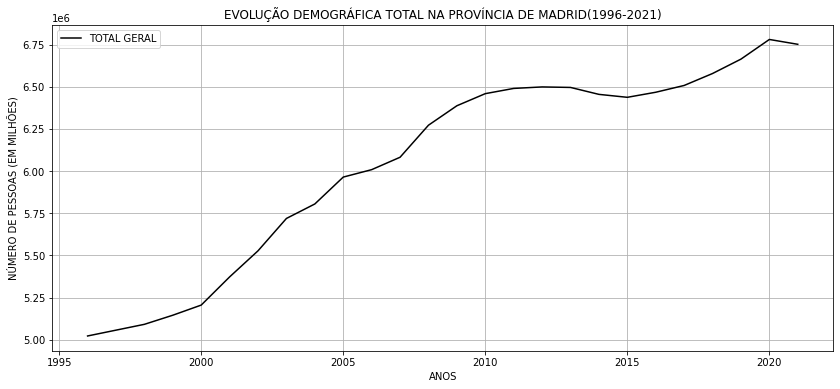

In [85]:

l190a3a = dfs90a3.iloc[0,1:26].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NA PROVÍNCIA DE MADRID(1996-2021)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
    2019,2020,2021]

y = l190a3a


# Plot another line on the same chart/graph
plt.plot(x, y,label = 'TOTAL GERAL', color = "black")

plt.legend()
plt.grid()


plt.show()

We will now draw up two graphs depicting the population development of the **Municipalities of León and Madrid**

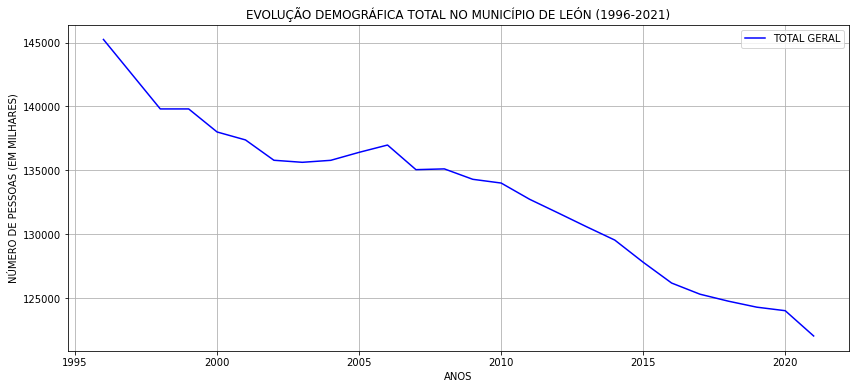

In [86]:

l180a3b = dfs80a3.iloc[82,1:26].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NO MUNICÍPIO DE LEÓN (1996-2021)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHARES)")

# Define data values
x = [1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
    2019,2020,2021]

y = l180a3b


# Plot another line on the same chart/graph
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")

plt.legend()
plt.grid()


plt.show()

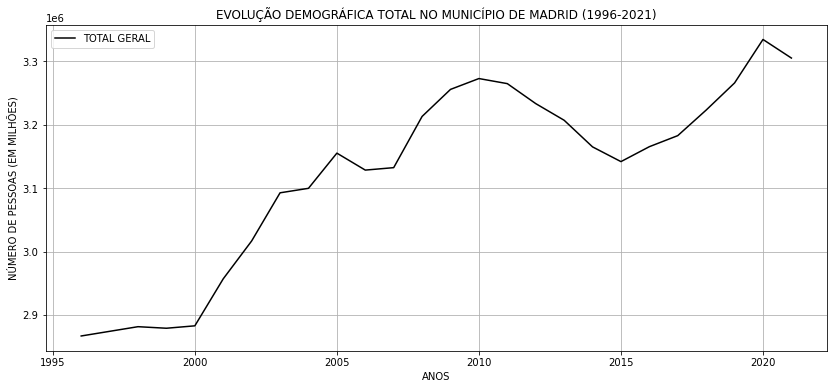

In [87]:

l190a3b = dfs90a3.iloc[79,1:26].tolist()
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.title("EVOLUÇÃO DEMOGRÁFICA TOTAL NO MUNICÍPIO DE MADRID (1996-2021)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [1996,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,
    2019,2020,2021]

y = l190a3b


# Plot another line on the same chart/graph
plt.plot(x, y,label = 'TOTAL GERAL', color = "black")

plt.legend()
plt.grid()


plt.show()

We will generate two dataframes, **dfs80a30** and **dfs90a30** that will present, respectively, the ordered list of the municipalities with the **highest population rate** and the list of the municipalities with the **highest percentage of population in relation to the province**. These municipalities are Villaquilambre and León.

In [88]:
import math

# Vamos fazer um código que gere um dataframe com as seguintes colunas:
# Região: nome do município e provincia que é uma. População em 1996, população em 2021, taxa demográfica,
# posição na província no tocante a número de habitantes, ou seja 5 colunas que serão 5 keys e cinco listas.

# Esta será a lista com os nomes dos municipios
list100=[]

# Esta será a lista com a população de 1996
list200=[]

# Esta será a lista com a população de 2021
list300=[]

# Esta será a lista com a percentagem de população sobre o total da provincia
list400=[]

# Esta será a lista com a percentual positivo ou negativo de crescimento entre 1993 e 2021
list500=[]

list100.append(dfs80a3.iloc[0,0])
list200.append(dfs80a3.iloc[0,1])
list300.append(dfs80a3.iloc[0,25])
result200=((dfs80a3.iloc[0,1]/dfs80a3.iloc[0,1])*100)
result210=round(result200,2)
list400.append(result210)
result220 = ((math.pow(dfs80a3.iloc[0,25]/dfs80a3.iloc[0,1],1/1) - 1)*100)
result230=round(result220,2)
list500.append(result230)
f = 1
for k in range(len(dfs80a3)):
    if f<=210:
        list100.append(dfs80a3.iloc[f,0])
        list200.append(dfs80a3.iloc[f,1])
        list300.append(dfs80a3.iloc[f,25])
        result200=((dfs80a3.iloc[f,1]/dfs80a3.iloc[0,1])*100)
        result210=round(result200,2)
        list400.append(result210)
        result220 = ((math.pow(dfs80a3.iloc[f,25]/dfs80a3.iloc[f,1],1/1) - 1)*100)
        result230=round(result220,2)
        list500.append(result230)
        f = f + 1
        
dict250={"MUNICÍPIO":list100,"1996":list200,"2021":list300,"POS.POP(%)":list400,"TAXA DEMOGR(%)":list500}
dfs80a30=pd.DataFrame(dict250)
dfs80a30.sort_values(by=["POS.POP(%)"],ascending=False,inplace=True)
dfs80a30.reset_index(inplace=True)

dfs80a31=pd.DataFrame(dict250)
dfs80a31.sort_values(by=["TAXA DEMOGR(%)"],ascending=False,inplace=True)
dfs80a31.reset_index(inplace=True)


Municipalities with **highest demographic rate**:

In [94]:
dfs80a31.head()

,index,MUNICÍPIO,1996,2021,POS.POP(%),TAXA DEMOGR(%)
0,203,24222 Villaquilambre,7048.0,18597.0,1.36,163.86
1,149,24163 Sariegos,2122.0,5170.0,0.41,143.64
2,176,24189 Valverde de la Virgen,4116.0,7442.0,0.80,80.81
3,70,24076 Garrafe de Torío,1097.0,1589.0,0.21,44.85
4,163,24175 Valdefresno,1608.0,2208.0,0.31,37.31


Municipalities with **higher percentage of population in relation to the province** (remembering that the row of index 0 refers to the province)

In [95]:
dfs80a30.head(5)

,index,MUNICÍPIO,1996,2021,POS.POP(%),TAXA DEMOGR(%)
0,0,24 León,517191.0,451706.0,100.00,-12.66
1,82,24089 León,145242.0,122051.0,28.08,-15.97
2,107,24115 Ponferrada,61575.0,63747.0,11.91,3.53
3,129,24142 San Andrés del Rabanedo,23226.0,30160.0,4.49,29.85
4,185,24202 Villablino,15284.0,8226.0,2.96,-46.18


We will generate two dataframes, **dfs90a30** and **dfs90a31** that will present, respectively, the ordered list of the municipalities with the **highest population rate** and the list of the municipalities with the **highest percentage of population in relation to the province**. These municipalities are Madrid and Arroyomolinos.

In [98]:
import math

# Vamos fazer um código que gere um dataframe com as seguintes colunas:
# Região: nome do município e provincia que é uma. População em 1996, população em 2021, taxa demográfica,
# posição na província no tocante a número de habitantes, ou seja 5 colunas que serão 5 keys e cinco listas.

# Esta será a lista com os nomes dos municipios
list600=[]

# Esta será a lista com a população de 1996
list700=[]

# Esta será a lista com a população de 2021
list800=[]

# Esta será a lista com a percentagem de população sobre o total da provincia
list900=[]

# Esta será a lista com a percentual positivo ou negativo de crescimento entre 1993 e 2021
list1000=[]

list600.append(dfs90a3.iloc[0,0])
list700.append(dfs90a3.iloc[0,1])
list800.append(dfs90a3.iloc[0,25])
result201=((dfs90a3.iloc[0,1]/dfs90a3.iloc[0,1])*100)
result211=round(result201,2)
list900.append(result211)
result221 = ((math.pow(dfs90a3.iloc[0,25]/dfs90a3.iloc[0,1],1/1) - 1)*100)
result231=round(result221,2)
list1000.append(result231)
f = 1
for k in range(len(dfs90a3)):
    if f<=178:
        list600.append(dfs90a3.iloc[f,0])
        list700.append(dfs90a3.iloc[f,1])
        list800.append(dfs90a3.iloc[f,25])
        result201=((dfs90a3.iloc[f,1]/dfs90a3.iloc[0,1])*100)
        result211=round(result201,2)
        list900.append(result211)
        result221 = ((math.pow(dfs90a3.iloc[f,25]/dfs90a3.iloc[f,1],1/1) - 1)*100)
        result231=round(result221,2)
        list1000.append(result231)
        f = f + 1
        
dict251={"MUNICÍPIO":list600,"1996":list700,"2021":list800,"POS.POP(%)":list900,"TAXA DEMOGR(%)":list1000}
dfs90a30=pd.DataFrame(dict251)
dfs90a30.sort_values(by=["POS.POP(%)"],ascending=False,inplace=True)
dfs90a30.reset_index(inplace=True)

dfs90a31=pd.DataFrame(dict251)
dfs90a31.sort_values(by=["TAXA DEMOGR(%)"],ascending=False,inplace=True)
dfs90a31.reset_index(inplace=True)


In [99]:
dfs90a30.head(5)

,index,MUNICÍPIO,1996,2021,POS.POP(%),TAXA DEMOGR(%)
0,0,28 Madrid,5022289.0,6751251.0,100.00,34.43
1,79,28079 Madrid,2866850.0,3305408.0,57.08,15.30
2,91,28092 Móstoles,196173.0,209639.0,3.91,6.86
3,74,28074 Leganés,174593.0,187762.0,3.48,7.54
4,58,28058 Fuenlabrada,163567.0,192233.0,3.26,17.53


In [37]:
dfs90a31.head(5)

,index,MUNICÍPIO,1996,2021,POS.POP(%),TAXA DEMOGR(%)
0,15,28015 Arroyomolinos,2709.0,33687.0,0.05,1143.52
1,36,28036 Casarrubuelos,622.0,3939.0,0.01,533.28
2,174,28177 Villanueva del Pardillo,2887.0,17310.0,0.06,499.58
3,52,28050 Cubas de la Sagra,1149.0,6642.0,0.02,478.07
4,136,28140 Serranillos del Valle,810.0,4429.0,0.02,446.79


Let's do a study on Regression considering the period from 1971 to 2022, for both sexes aged between 0 and 4 years.
For this we will use the following data:.

                        https://www.ine.es/jaxiT3/files/t/es/xlsx/10256.xlsx?nocab=1
                        
Let's make the download transforming into a dataframe **dfs190**. Next we will export locally as **dfs190.csv**. This was done to minimize processing time by working with local data initially in a **dfs190a** dataframe.

In [38]:
url190_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/10256.xlsx?nocab=1"
dfs190=pd.read_excel(url190_estatica, header=None,skiprows=[0,1,2,3,4,5,5])
dfs190.to_csv('dfs190.csv', index=False)
dfs190.head(6)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,,1 de enero de 2022,1 de julio de 2021,1 de enero de 2021,1 de julio de 2020,1 de enero de 2020,1 de julio de 2019,1 de enero de 2019,1 de julio de 2018,1 de enero de 2018,...,1 de julio de 1975,1 de enero de 1975,1 de julio de 1974,1 de enero de 1974,1 de julio de 1973,1 de enero de 1973,1 de julio de 1972,1 de enero de 1972,1 de julio de 1971,1 de enero de 1971
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ambos sexos,47432805,47331545,47398695,47355685,47332614,47105358,46937060,46728814,46658447,...,35750033,35569375,35363890,35177294,34980317,34800600,34595886,34408338,34216856,34040642
3,Hombres,23236999,23191350,23227282,23208782,23199313,23091898,23009259,22911649,22881882,...,17512929,17419371,17314892,17220063,17119603,17027972,16923533,16827942,16730904,16641744
4,Mujeres,24195806,24140195,24171413,24146903,24133301,24013460,23927801,23817165,23776565,...,18237105,18150004,18048997,17957230,17860714,17772628,17672353,17580397,17485953,17398898
5,0 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's now work with the data stored in **dfs190.csv** and prepare it to display the population development of people aged between **0 and 4 years old**. This is an attempt to visualize the "birth" between the period 1971 and 2022.

To do so, we will filter the data for this age group and add them from 0 to 4 years old, as the data are for ages 0 to 4 years old independently. The following statement treats the data so that it is displayed at the end as a 2-column dataframe and the number of rows associated with the years. As it has two pieces of information per year, the amount is **103** periods, because 2022 is only the first semester. So the final result of this "filtering" is the dataframe **dfs190g**.
In the regression graph we will stick to the first order, but knowing that the fourth order is the closest to the data.

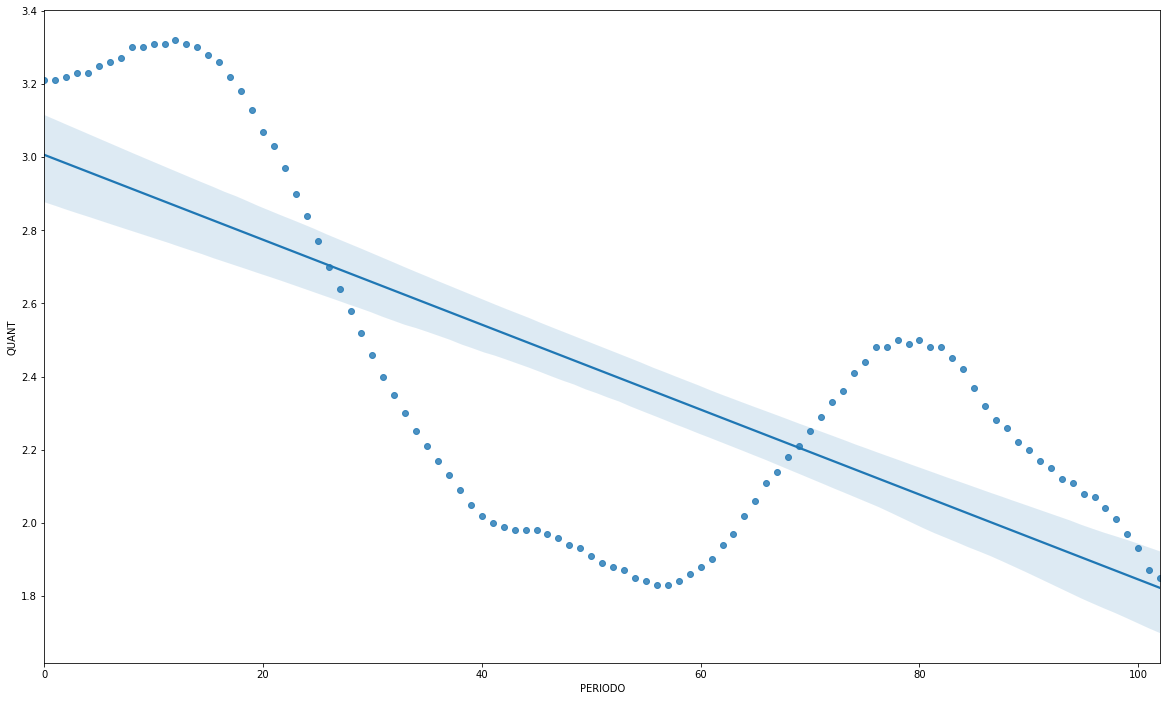

In [103]:
import math
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

dfs190a=pd.read_csv('dfs190.csv')
dfs190a=dfs190a.iloc[:, ::-1]
dfs190b=dfs190a.iloc[0:25,:]
dfs190c=dfs190b.iloc[[0,1,6,10,14,18,22],:]
dfs190c.reset_index(drop=True,inplace = True)
dfs190c.fillna(0,inplace=True)
dfs190c.iloc[1:3,0:102]=dfs190c.iloc[1:3,0:102].astype(int)
f = 0
for q in range(len(dfs190c.columns)):
    if f <= 102:
        dfs190c.iloc[2:7,f]=dfs190c.iloc[2:7,f].astype(int)
        dfs190c.iloc[1,f]=dfs190c.iloc[2:7,f].sum()
        dfs190c.iloc[0,f]=f
        f = f + 1

dfs190c.columns = range(dfs190c.columns.size)
dfs190d=dfs190c.iloc[0:2,0:103]

list1000=[]
list2000=[]
list1000=dfs190d.iloc[0,:].tolist()
list2000=dfs190d.iloc[1,:].tolist()
list3000=[(x/1000000) for x in list2000]
list4000 = [round(item, 2) for item in list3000]
dict1000={'PERIODO':list1000,'QUANT':list4000}
dfs190g=pd.DataFrame(dict1000)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
ax=sns.regplot(x='PERIODO',y='QUANT',data=dfs190g, order=1)

In [41]:
import numpy as np
x = dfs190g['PERIODO']
y = dfs190g['QUANT']
# Aqui vamos usar a polinomial de terceiro grau(cubico) 
f = np.polyfit(x, y, 1)
print(f)
print('--------------------------------------------------------------')
p = np.poly1d(f)
print(p)

[-0.01161139  3.00645258]
--------------------------------------------------------------
 
-0.01161 x + 3.006


In [42]:
dfs190g[["PERIODO", "QUANT"]].corr()

,PERIODO,QUANT
PERIODO,1.000000,-0.698857
QUANT,-0.698857,1.000000


P-Value

The P-Value is the probability value that the correlation between these two variables is statistically significant. We usually choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

- P-value is < 0.001: we say that there is strong evidence that the correlation is significant.
- P-value is < 0.05: there is moderate evidence that the correlation is significant.
- P-value is < 0.1: there is weak evidence that the correlation is significant.
- P-value is > 0.1: there is no evidence that the correlation is significant.

As the p-value seen below is **0.00000000000000022436**, and less than **0.001**, there is strong evidence that the correlation is significant.

In [104]:
from scipy import stats
inclinação, intercept, rvalue, pvalue, stderr = stats.linregress(dfs190g['PERIODO'],dfs190g['QUANT'])
print("INCLINAÇÃO:",inclinação)
print("RVALUE   :",rvalue)
print("PVALUE   :",pvalue)
print("STDERR   :",stderr)

print('--------------Valor de P-Value------------')

print('{:.20f}'.format(pvalue))

INCLINAÇÃO: -0.011611386899793524
RVALUE   : -0.6988570591357186
PVALUE   : 2.243598771163391e-16
STDERR   : 0.0011824963701599718
--------------Valor de P-Value------------
0.00000000000000022436


Considering the simple and first order regression, the equation becomes: $y = -0.01161x + 3.00645258$. The correlation was **-0.698**, indicating a strong negative direct correlation, that is, that the period of years is a good predictor of the quantity. Below is a pure application of the equation to visualize a graph:

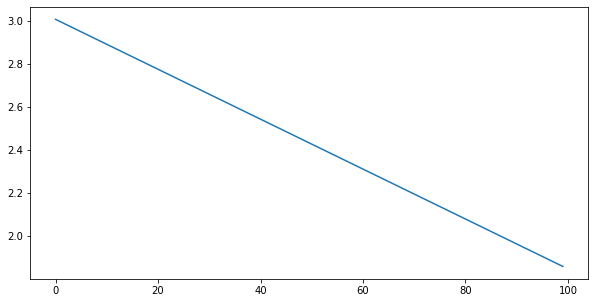

In [106]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
 
# Criando os vetores X e Y
# x = np.linspace(0, 100, 100)
x = np.array(range(100))
y = -0.0116*x + 3.006

 
fig = plt.figure(figsize = (10, 5))
# Criando o gráfico
plt.plot(x, y)
 
# E mostrando o gráfico
plt.show()

It is verified, by Simple Regression, that the population coefficient for the age group from 0 to 4 years, in the period from 1972 to 2022, comes in descending order. By the equation to remove the value of x, the equation is: **x=(y - 3.006)/-0.0116**. If you make **y = 0**, that is, population from 0 to 4 years old equals "zero", a value of **x = 259** appears, which divided by **2** and added to **1971** gives around **2100** which would be the year in which **there would be no more people aged 0 to 4 years old**.

In [107]:
y=0
a= -0.01161139
b= 3.00645258

x=(y - b)/a

# y=a*x + b

# y = ((-4.06* 1/10**7)*x**4) + ((7.883*1/10**5)*x**3) - ((0.004)*x**2) + (0.053)*x + 3.163
x
print(x)
print(1971 + (x/2))

258.9227112344
2100.4613556172


Let's do a Regression to the age of 0 years, that is, from **newborns to less than 1 year old**..

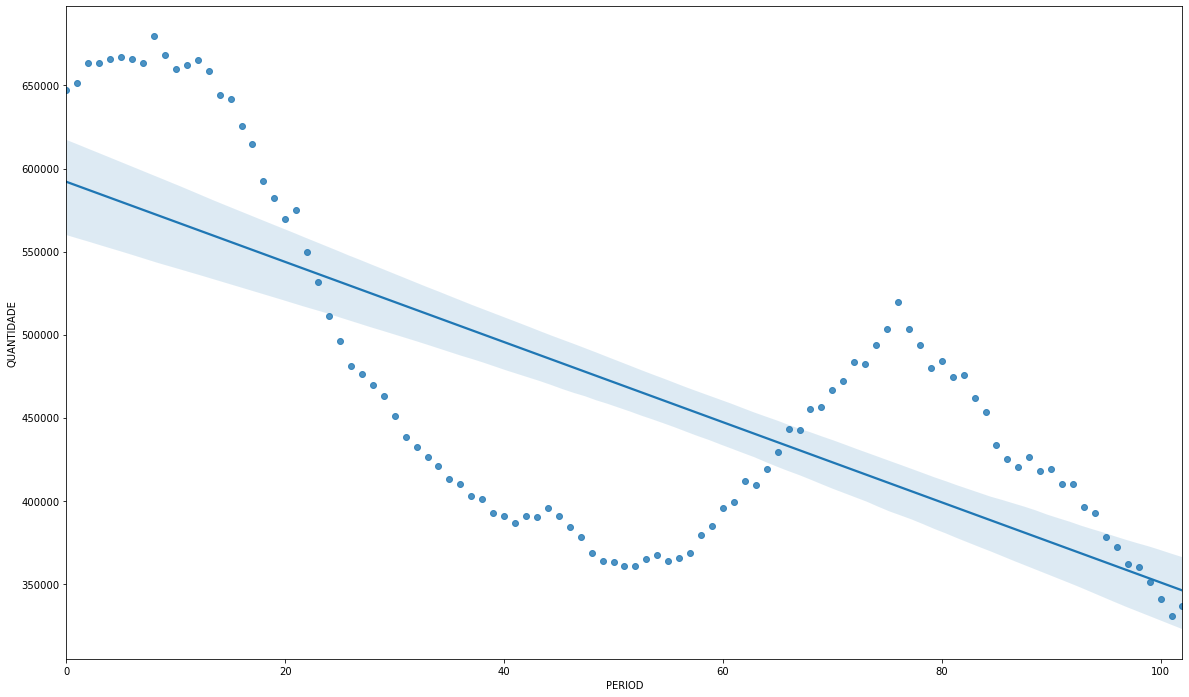

In [108]:
dfs190x=dfs190c.iloc[[0,2],:]
dfs190x.reset_index(drop=True,inplace = True)
dfs190x
list450=dfs190x.iloc[0,0:103].tolist()
list550=dfs190x.iloc[1,0:103].tolist()
dict650={'PERIOD':list450,'QUANTIDADE':list550}
dfs190y=pd.DataFrame(dict650)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)
ax=sns.regplot(x='PERIOD',y='QUANTIDADE',data=dfs190y, order=1)

In [109]:
import numpy as np
x = dfs190y['PERIOD']
y = dfs190y['QUANTIDADE']
# Aqui vamos usar a polinomial de terceiro grau(cubico) 
f = np.polyfit(x, y, 1)
print(f)
print('--------------------------------------------------------------')
p = np.poly1d(f)
print(p)


[ -2411.17138558 591989.77949963]
--------------------------------------------------------------
 
-2411 x + 5.92e+05


In [110]:
dfs190y[["PERIOD", "QUANTIDADE"]].corr()

,PERIOD,QUANTIDADE
PERIOD,1.000000,-0.703345
QUANTIDADE,-0.703345,1.000000


In [111]:
y=0
a= -2411.17
b= 591989.78

x=(y - b)/a

# y=a*x + b

# y = ((-4.06* 1/10**7)*x**4) + ((7.883*1/10**5)*x**3) - ((0.004)*x**2) + (0.053)*x + 3.163
x
print(x)
print(1971 + (x/2))

245.51971864281657
2093.7598593214084


It is verified, by Simple Regression, that the population coefficient of 0 years, in the period from 1972 to 2022, also comes in descending order. It is verified that the negative direct correlation between the period of years and the quantity is shown in a value of **-0.703**, which indicates a strong relationship, that is, the years are good predictors of the population quantity. By the equation to remove the value of x, the equation is: **x=(y - 591989.78)/-2411.17**. If you make **y = 0**, that is, population of 0 years equals "zero", a value of **x = 245** appears, which divided by **2** and summed in **1971** gives around **2093** which would be the year in which **there would be no more people aged 0 years**.

## Conclusions:

In these two jupyter notebooks, the previous one and the current one, I tried to address three relevant themes. One, which would be to identify what to deal with within Data Science. Another, which is to identify the sources of information, and the way to seek this information. Another is to receive the raw data, process them, evaluate, store the data locally and carry out analyzes within the field of Data Science.

In this way, and following this line, I identified doing some research on demographic issues, and I chose Spain as a data source, through INE. So I was able to exercise a lot about the treatment of raw data and leave them ready for use, within my perspective and thus make some analyses, trying to use graphical methods in addition to tables. Some conclusions can be drawn. Are they:

- Spain has a modest rate of population growth and to circumvent this issue seeks to facilitate immigration.
- The Age Pyramid has a certain degree of maturity, meaning a modest birth rate, a modest death rate, meaning longer life span and an increase in older people, which requires greater social assistance.
- This Pyramid may still represent a lack of suitable people for the job market who are around 20 to 50 years old, and may represent an extension of this age range due to the lack of manpower.
- This Pyramid may still represent the lack of skilled labor that can be supplied through the migratory process.
- The emptying of municipalities may represent the need to develop for these small municipalities, especially for those that are far from the most populous centers, technologies that aim to access data networks with greater capacity, development of work "Home Office", development of telemedicine, and enhancement of these municipalities through tourism, development of new products and services, among other things.
- Another issue verified by the Linear Regression is the constant fall of individuals between 0 and 4 years old and that, by the equation itself, would tend to stay at **zero**, around the year 2100, of course without a study of precision of the estimates.
- Another issue verified by the Linear Regression is the constant fall of individuals aged 0 years and that, by the equation itself, would tend to stay at **zero**, around the year 2093, of course without a study of precision of the estimates.

Would this demographic issue be a matter only for Spain? No, as can be seen in the figure extracted from the Eurostat website:
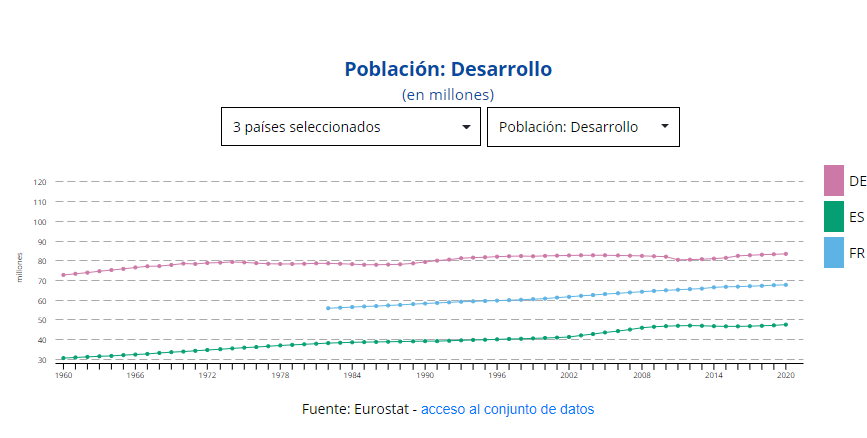

It can be seen that the degree of growth is similar as can be seen in the figure above where the population growth of Spain (ES), France (FR) and Germany (DE) can be seen.

Thus, the analysis and treatment must be unified, looking at the scenario as a whole on the planet.